# Future Selection

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F48C-6A56

 Directory of C:\Users\cm\Desktop\deployed-\30052021 Housing data Kaggle\8. Pipline\future selection

03-09-2021  23:49    <DIR>          .
03-09-2021  23:49    <DIR>          ..
18-08-2021  20:17    <DIR>          .ipynb_checkpoints
03-09-2021  23:49            37,658 20210818 FS-House_price_prediction_kaggle.ipynb
18-08-2021  01:48    <DIR>          results
03-09-2021  22:59           244,410 test.csv
18-08-2021  21:23           331,645 X_train.csv
03-09-2021  18:58           251,570 X_train_notscaled.csv
18-08-2021  21:23            28,902 y_train.csv
03-09-2021  18:58            28,902 y_train_notscaled.csv
               6 File(s)        923,087 bytes
               4 Dir(s)  98,265,456,640 bytes free


In [29]:
#scaled data
#df = pd.read_csv("C:\\Users\\cm\Desktop\\deployed-\\30052021 Housing data Kaggle\\8. Pipline\\future engineering\\X_train.csv")

In [30]:
# Non scaled data
df = pd.read_csv("C:\\Users\\cm\Desktop\\deployed-\\30052021 Housing data Kaggle\\8. Pipline\\future engineering\\X_train_notscaled.csv")

In [31]:
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,BsmtFinType2_Missing,Electrical_Missing,FireplaceQu_Missing,GarageType_Missing,GarageFinish_Missing,GarageQual_Missing,GarageCond_Missing,PoolQC_Missing,Fence_Missing,MiscFeature_Missing
0,0,1,60,0.788356,4.174387,9.041922,0.99589,0.937671,0.633562,0.897945,...,0,0,1,0,0,0,0,1,1,1
1,1,2,20,0.788356,4.382027,9.169518,0.99589,0.937671,0.633562,0.897945,...,0,0,0,0,0,0,0,1,1,1
2,2,3,60,0.788356,4.219508,9.328123,0.99589,0.937671,0.331507,0.897945,...,0,0,0,0,0,0,0,1,1,1
3,3,4,70,0.788356,4.094345,9.164296,0.99589,0.937671,0.331507,0.897945,...,0,0,0,0,0,0,0,1,1,1
4,4,5,60,0.788356,4.430817,9.565214,0.99589,0.937671,0.331507,0.897945,...,0,0,0,0,0,0,0,1,1,1


In [32]:
X_train = df.drop(["Id","SalePrice"], axis = 1)

In [33]:
X_train = df

In [34]:
y_train = df["SalePrice"]

In [35]:
X_train.shape, y_train.shape

((1460, 101), (1460,))

**Using Person Correlation for relation between independent variables**

<AxesSubplot:>

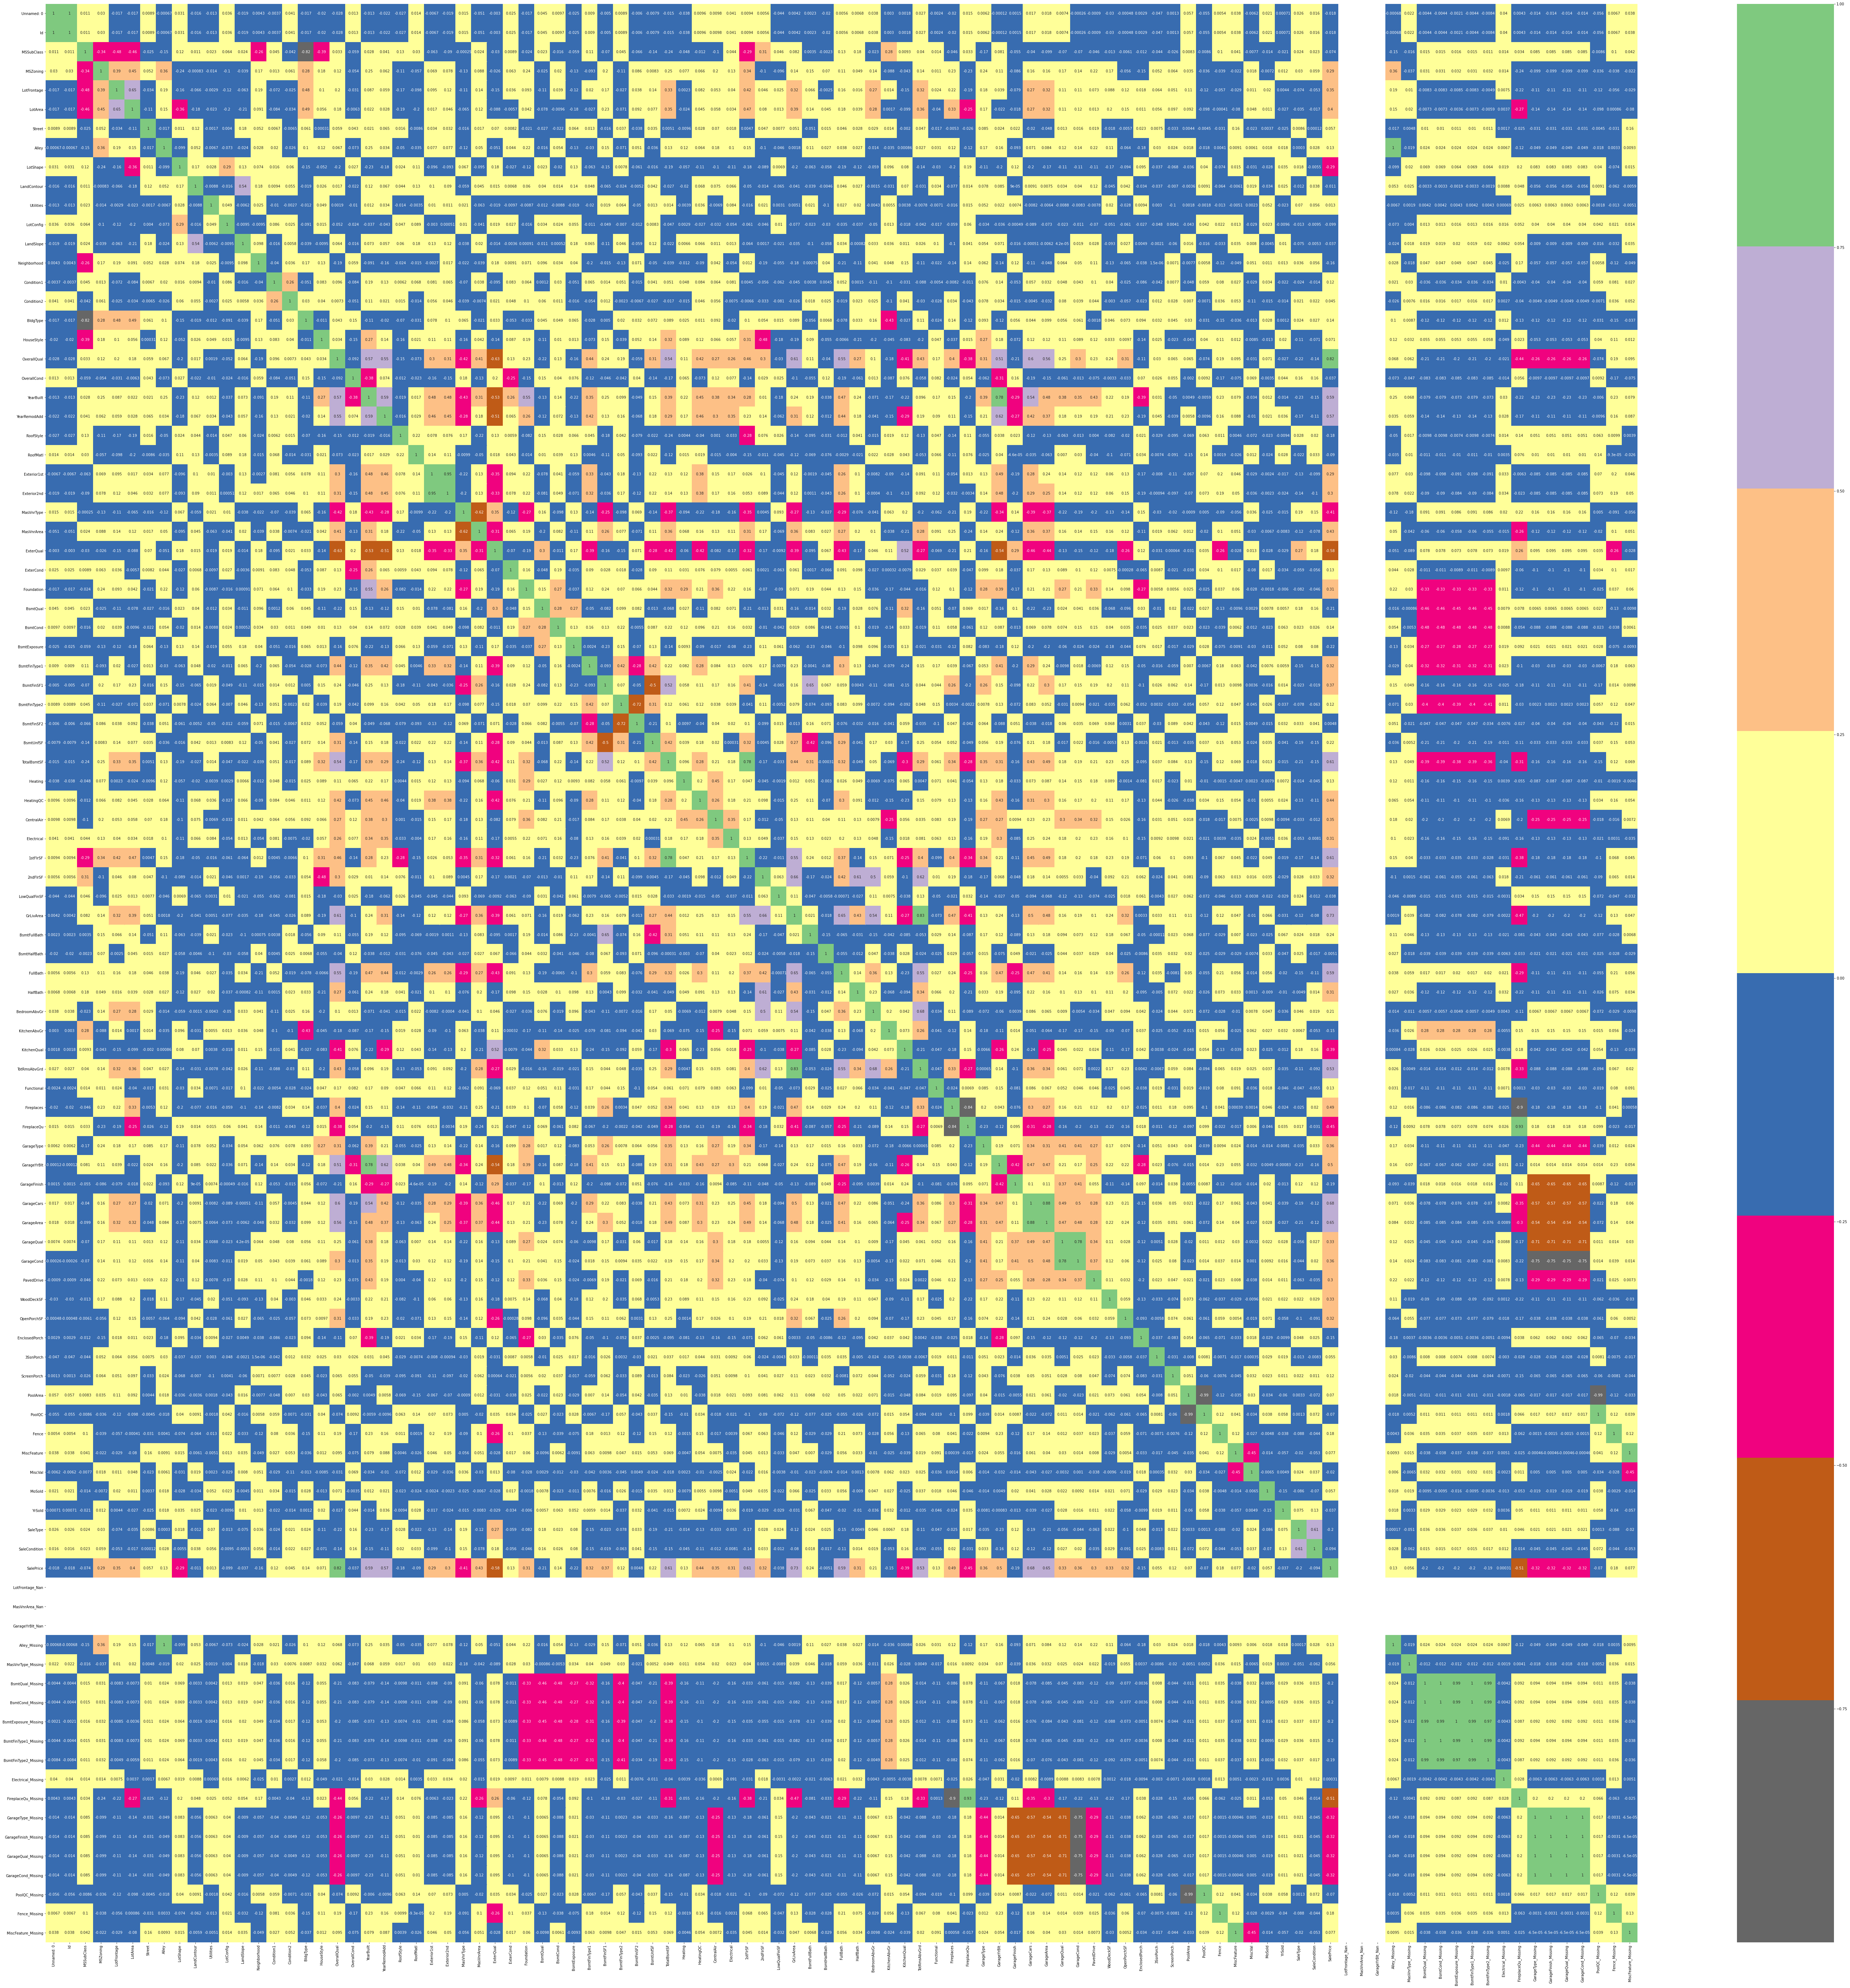

In [36]:
#trying to find correlation between independent variables
# Heat map for correlation
plt.figure(figsize = (100, 100))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Accent_r)

In [37]:
# Finding highly correlated values and removing for
def correlation(dataset, threshold):
  col_corr = set() # Set of all the names correlated columns
  corr_matrix = dataset.corr()

  for i in range(len(corr_matrix)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  
  return col_corr

In [38]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

25

In [39]:
corr_features

{'1stFlrSF',
 'Alley_Missing',
 'BldgType',
 'BsmtCond_Missing',
 'BsmtExposure_Missing',
 'BsmtFinSF2',
 'BsmtFinType1_Missing',
 'BsmtFinType2_Missing',
 'Exterior2nd',
 'Fence_Missing',
 'FireplaceQu',
 'FireplaceQu_Missing',
 'GarageArea',
 'GarageCond',
 'GarageCond_Missing',
 'GarageFinish_Missing',
 'GarageQual_Missing',
 'GarageType_Missing',
 'GarageYrBlt',
 'Id',
 'MiscFeature_Missing',
 'PoolQC',
 'PoolQC_Missing',
 'SalePrice',
 'TotRmsAbvGrd'}

In [40]:
# droping columns 
X_train.drop(corr_features,axis = 1, inplace = True
            )

**selecting features based on information gain**

In [41]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.00000000e+00, 2.81527974e-01, 1.14185246e-01, 2.13568614e-01,
       1.99449104e-01, 8.50192038e-04, 1.38781229e-02, 9.04884397e-02,
       3.10335407e-02, 0.00000000e+00, 1.13840348e-02, 7.61396991e-03,
       3.59564121e-01, 1.16217102e-02, 0.00000000e+00, 8.32416824e-02,
       5.69089923e-01, 1.07166674e-01, 3.61603043e-01, 2.36809813e-01,
       1.45751952e-02, 0.00000000e+00, 1.31148818e-01, 9.62347385e-02,
       9.07679691e-02, 3.20610474e-01, 2.29155356e-02, 1.90957026e-01,
       3.19965221e-01, 3.45621129e-02, 7.02986282e-02, 1.48214135e-01,
       1.44092041e-01, 3.31180654e-03, 1.28529380e-01, 3.61846589e-01,
       2.15320170e-02, 1.58347557e-01, 6.51417288e-02, 5.19476990e-02,
       2.04862277e-01, 5.13348993e-03, 4.78724845e-01, 3.03046654e-02,
       1.29021991e-02, 2.70361812e-01, 8.39758030e-02, 6.90346640e-02,
       1.93069675e-02, 3.28477382e-01, 0.00000000e+00, 1.70684239e-01,
       1.66858900e-01, 2.60668351e-01, 3.68059384e-01, 6.90676229e-02,
      

In [42]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

OverallQual        0.569090
GrLivArea          0.478725
GarageCars         0.368059
TotalBsmtSF        0.361847
YearBuilt          0.361603
                     ...   
MasVnrArea_Nan     0.000000
GarageYrBlt_Nan    0.000000
Condition2         0.000000
Utilities          0.000000
Unnamed: 0         0.000000
Length: 76, dtype: float64

In [43]:
# Select top 20  percentile
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression,percentile= 20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001482B72FEE0>)

In [44]:
selectd=  X_train.columns[selected_top_columns.get_support()]

In [45]:
X_train = X_train[selectd]

In [46]:
X_train.head()

,MSSubClass,LotFrontage,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,GarageFinish,GarageCars
0,60,4.174387,0.102740,7,2003,2003,0.334247,0.423288,856,854,7.444249,2,0.401370,0.289041,2
1,20,4.382027,0.007534,6,1976,1976,0.620548,0.423288,1262,0,7.140453,2,0.503425,0.289041,2
2,60,4.219508,0.102740,7,2001,2002,0.334247,0.423288,920,866,7.487734,2,0.401370,0.289041,2
3,70,4.094345,0.034932,7,1915,1970,0.620548,0.444521,756,756,7.448334,1,0.401370,0.414384,3
4,60,4.430817,0.028082,8,2000,2000,0.334247,0.423288,1145,1053,7.695303,2,0.401370,0.289041,3


In [47]:
X_train.shape

(1460, 15)

In [48]:
#X_train.to_csv("X_train.csv", index = False)
#X_train.to_csv("X_train_notscaled.csv", index = False)

In [49]:
#y_train.to_csv("y_train.csv", index = False)
#y_train.to_csv("y_train_notscaled.csv", index = False)

### future selection for test set

In [50]:
# Feature selection for test data
df = pd.read_csv("C:\\Users\\cm\Desktop\\deployed-\\30052021 Housing data Kaggle\\8. Pipline\\future engineering\\kaggle.csv")

In [51]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Functional_Missing,FireplaceQu_Missing,GarageType_Missing,GarageFinish_Missing,GarageQual_Missing,GarageCond_Missing,PoolQC_Missing,Fence_Missing,MiscFeature_Missing,SaleType_Missing
0,1461,20,0.006854,4.382027,9.360655,0.995888,0.926662,0.640164,0.898561,0.998629,...,0,1,0,0,0,0,1,0,1,0
1,1462,20,0.763537,4.394449,9.565704,0.995888,0.926662,0.331734,0.898561,0.998629,...,0,1,0,0,0,0,1,1,0,0
2,1463,60,0.763537,4.304065,9.534595,0.995888,0.926662,0.331734,0.898561,0.998629,...,0,0,0,0,0,0,1,0,1,0
3,1464,60,0.763537,4.356709,9.208138,0.995888,0.926662,0.331734,0.898561,0.998629,...,0,0,0,0,0,0,1,1,1,0
4,1465,120,0.763537,3.761200,8.518193,0.995888,0.926662,0.331734,0.047978,0.998629,...,0,1,0,0,0,0,1,1,1,0


In [52]:
Id = df["Id"]

In [53]:
dataset = df[X_train.columns]

In [54]:
dataset.head()

,MSSubClass,LotFrontage,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,GarageFinish,GarageCars
0,20,4.382027,0.149417,5,1961,1961,0.611378,0.434544,882.0,0,6.797940,1,0.518849,0.428376,1.0
1,20,4.394449,0.149417,6,1958,1958,0.611378,0.434544,1329.0,0,7.192182,1,0.387252,0.428376,1.0
2,60,4.304065,0.058944,5,1997,1998,0.611378,0.405072,928.0,701,7.395722,2,0.518849,0.251542,2.0
3,60,4.356709,0.058944,6,1998,1998,0.611378,0.434544,926.0,678,7.380256,2,0.387252,0.251542,2.0
4,120,3.761200,0.017820,8,1992,1992,0.336532,0.405072,1280.0,0,7.154615,2,0.387252,0.266621,2.0


In [55]:
dataset["Id"] = Id

<ipython-input-55-c524c646cf54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Id"] = Id


In [56]:
dataset.head()

,MSSubClass,LotFrontage,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,GarageFinish,GarageCars,Id
0,20,4.382027,0.149417,5,1961,1961,0.611378,0.434544,882.0,0,6.797940,1,0.518849,0.428376,1.0,1461
1,20,4.394449,0.149417,6,1958,1958,0.611378,0.434544,1329.0,0,7.192182,1,0.387252,0.428376,1.0,1462
2,60,4.304065,0.058944,5,1997,1998,0.611378,0.405072,928.0,701,7.395722,2,0.518849,0.251542,2.0,1463
3,60,4.356709,0.058944,6,1998,1998,0.611378,0.434544,926.0,678,7.380256,2,0.387252,0.251542,2.0,1464
4,120,3.761200,0.017820,8,1992,1992,0.336532,0.405072,1280.0,0,7.154615,2,0.387252,0.266621,2.0,1465


In [57]:
dataset.to_csv("test.csv",index = False)